**This Block will load the Saved data from google drive, and we use it to extract the graphs for a specific run (Prime, Seed, run)**



*   The data was generated using Another notebook (experiment 1 (Prime vs Time))
*   The data set we have was a run over the following, 3 runs each seed.

*   prime_numbers = [61, 89,97,113,131,157,193,239,269]
*   seeds = [42,56,12]


*   The model used is 2 Layer fully connected MLP, with Relu activation, Normal distribution initialization, Loss function: Cross entropy, and AdamW as an optimizer.
*   The Parameters for this Experiment were
1.   alpha = 0.6
2.   learning_rate = 0.011
3.   Weight decay= 1
4.   epochs = 5000
5.   The operation here was **(a+b) mod p** *(to be extended later on)*










In [ ]:
results= torch.load('/content/gdrive/My Drive//Files/Research/Experiment/Prime_vs_time/Data/(FULL) results_lr=0.011_alpha=0.6_wd=1.pt')
print(results.keys())

dict_keys([(61, 42, 1), (61, 42, 2), (61, 42, 3), (61, 56, 1), (61, 56, 2), (61, 56, 3), (61, 12, 1), (61, 12, 2), (61, 12, 3), (89, 42, 1), (89, 42, 2), (89, 42, 3), (89, 56, 1), (89, 56, 2), (89, 56, 3), (89, 12, 1), (89, 12, 2), (89, 12, 3), (97, 42, 1), (97, 42, 2), (97, 42, 3), (97, 56, 1), (97, 56, 2), (97, 56, 3), (97, 12, 1), (97, 12, 2), (97, 12, 3), (113, 42, 1), (113, 42, 2), (113, 42, 3), (113, 56, 1), (113, 56, 2), (113, 56, 3), (113, 12, 1), (113, 12, 2), (113, 12, 3), (131, 42, 1), (131, 42, 2), (131, 42, 3), (131, 56, 1), (131, 56, 2), (131, 56, 3), (131, 12, 1), (131, 12, 2), (131, 12, 3), (157, 42, 1), (157, 42, 2), (157, 42, 3), (157, 56, 1), (157, 56, 2), (157, 56, 3), (157, 12, 1), (157, 12, 2), (157, 12, 3), (193, 42, 1), (193, 42, 2), (193, 42, 3), (193, 56, 1), (193, 56, 2), (193, 56, 3), (193, 12, 1), (193, 12, 2), (193, 12, 3), (239, 42, 1), (239, 42, 2), (239, 42, 3), (239, 56, 1), (239, 56, 2), (239, 56, 3), (239, 12, 1), (239, 12, 2), (239, 12, 3), (269, 42

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


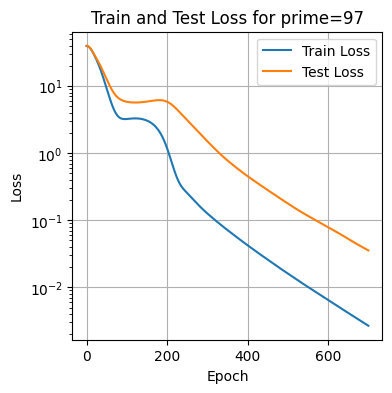

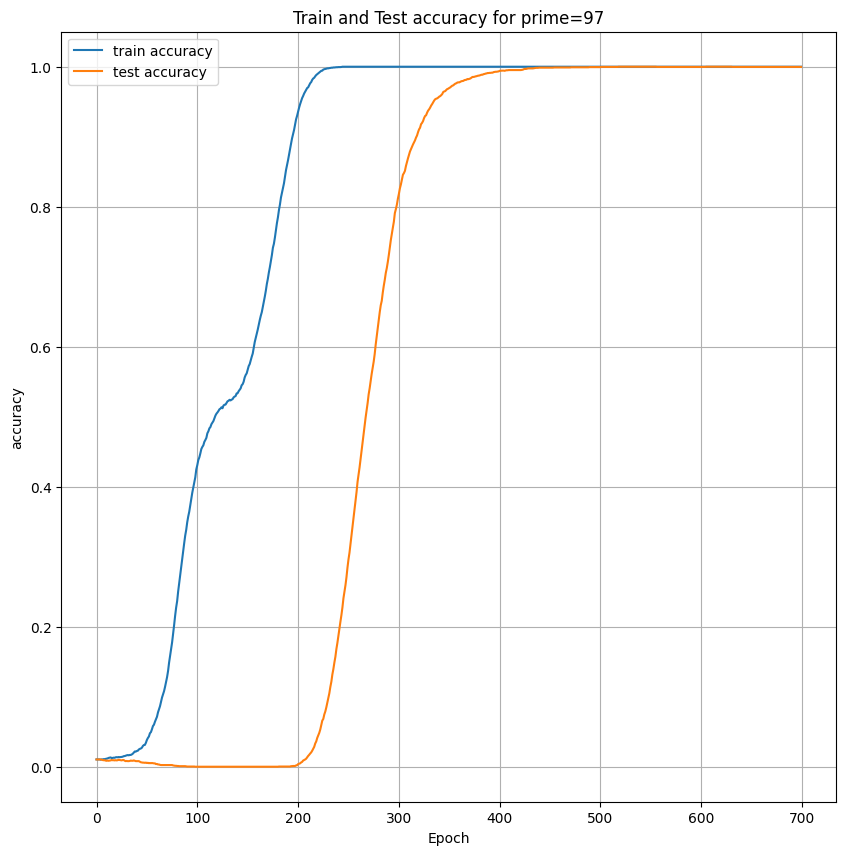

In [46]:
# Import necessary libraries
import torch
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/gdrive')
# Load the results tensor
results = torch.load('/content/gdrive/My Drive//Files/Research/Experiment/Prime_vs_time/Data/(Width 64) results_lr=0.022_alpha=0.6_wd=1.pt')

# Extract the data for a specific prime number, seed, and run
prime_number = 97  # Replace with desired prime number
seed = 56  # Replace with desired seed
run = 1  # Replace with desired run number
experiment_results = results[(prime_number, seed, run)]

# Extract train and test loss
train_loss = experiment_results['train_loss']
test_loss = experiment_results['test_loss']
train_accuracy = experiment_results['train_accuracy']
test_accuracy = experiment_results['test_accuracy']
# Define a function to plot loss
def plot_loss(train_loss, test_loss):
    plt.figure(figsize=(4, 4))
    plt.plot(train_loss, label='Train Loss')
    plt.plot(test_loss, label='Test Loss')
    plt.title(f'Train and Test Loss for prime={prime_number}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.yscale('log')
    plt.grid(True)
    plt.show()
def plot_acc(train_accuracy, test_accuracy):
    plt.figure(figsize=(10, 10))
    plt.plot(train_accuracy, label='train accuracy')
    plt.plot(test_accuracy, label='test accuracy')
    plt.title(f'Train and Test accuracy for prime={prime_number}')
    plt.xlabel('Epoch')
    plt.ylabel('accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()
# Plot the loss
plot_loss(train_loss, test_loss)
plot_acc(train_accuracy,test_accuracy)

**The following block is to graph Average Grokking time vs prime**



*   Grokking time is defined by when did the model hit 99% on test accuracy for the first time for each run




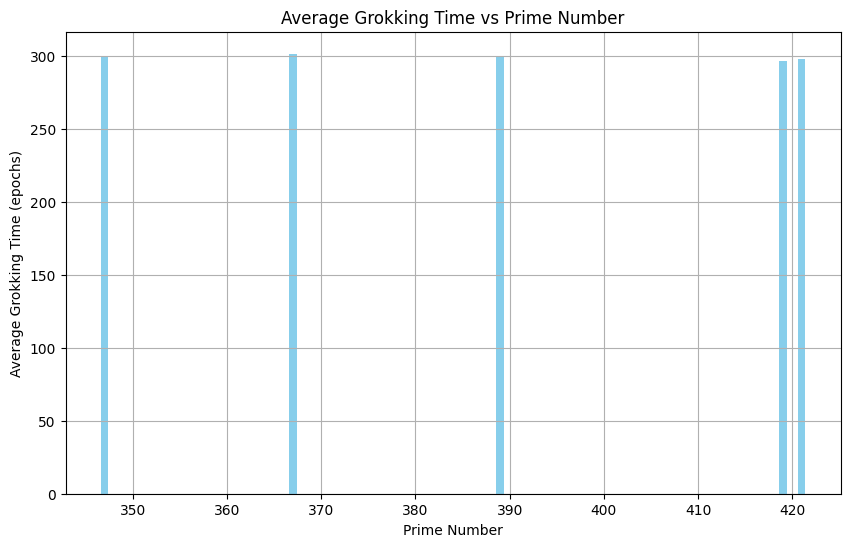

defaultdict(<class 'list'>, {347: [311, 297, 300, 293, 296, 298], 367: [303, 307, 307, 304, 295, 294], 389: [307, 294, 303, 299, 296, 299], 419: [299, 294, 297, 301, 294, 296], 421: [292, 296, 300, 295, 307, 299]})
{347: 299.1666666666667, 367: 301.6666666666667, 389: 299.6666666666667, 419: 296.8333333333333, 421: 298.1666666666667}


In [49]:
import torch
from collections import defaultdict
import matplotlib.pyplot as plt

def calculate_grokking_times(results):
    # Initialize a dictionary to store the grokking times for each (Prime number, Seed, Run)
    grok_times = defaultdict(list)

    # Iterate through each (Prime number, Seed, Run)
    for (prime, seed, run), data in results.items():
        # Get the 'test_accuracy' list
        test_accuracy = data['test_accuracy']

        # Find the first epoch where accuracy is 99% or higher
        for epoch, accuracy in enumerate(test_accuracy):
            if accuracy >= 0.99:
                grok_times[prime].append(epoch)
                break

    # Now calculate the average grokking time for each prime
    avg_grok_times = {prime: sum(times) / len(times) for prime, times in grok_times.items()}

    # Create lists of primes and corresponding average grokking times
    primes = list(avg_grok_times.keys())
    avg_times = list(avg_grok_times.values())

    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.bar(primes, avg_times, color='skyblue')
    plt.xlabel('Prime Number')
    plt.ylabel('Average Grokking Time (epochs)')
    plt.title('Average Grokking Time vs Prime Number')
    plt.grid(True)
    plt.show()

    return avg_grok_times, grok_times

# Load the tensor file
results = torch.load('/content/gdrive/My Drive//Files/Research/Experiment/Prime_vs_time/Data/(Width 256)(More Primes) results_lr=0.022_alpha=0.6_wd=1.pt')

# Calculate and plot the grokking times
avg_grok_times,grok_times = calculate_grokking_times(results)
print(grok_times)
print(avg_grok_times)

**This block is an initial attempt to fit the data**
*(To be modified later)*

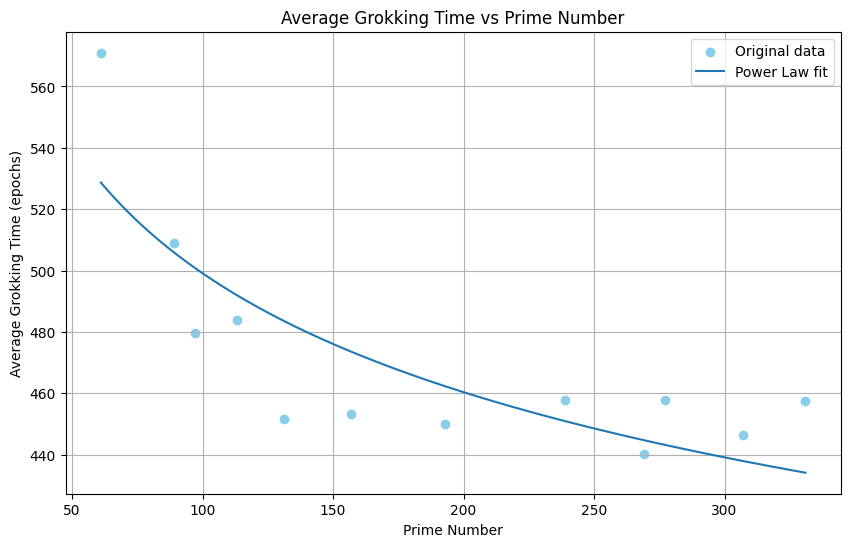

{'Power Law': array([ 8.53664428e+02, -1.16555356e-01])}


In [ ]:
# Import the required libraries
import numpy as np
import torch
from scipy.optimize import curve_fit
from collections import defaultdict
import matplotlib.pyplot as plt

# Define function to calculate grokking times
def calculate_grokking_times(results):
    # Initialize a dictionary to store the grokking times for each (Prime number, Seed, Run)
    grok_times = defaultdict(list)

    # Iterate through each (Prime number, Seed, Run)
    for (prime, seed, run), data in results.items():
        # Get the 'test_accuracy' list
        test_accuracy = data['test_accuracy']

        # Find the first epoch where accuracy is 99% or higher
        for epoch, accuracy in enumerate(test_accuracy):
            if accuracy >= 0.99:
                grok_times[prime].append(epoch)
                break

    # Now calculate the average grokking time for each prime
    avg_grok_times = {prime: sum(times) / len(times) for prime, times in grok_times.items()}

    # Create lists of primes and corresponding average grokking times
    primes = list(avg_grok_times.keys())
    avg_times = list(avg_grok_times.values())

    return avg_grok_times, grok_times, primes, avg_times

# Load the tensor file
results = torch.load('/content/gdrive/My Drive//Files/Research/Experiment/Prime_vs_time/Data/results_lr=0.011_alpha=0.8_wd=1.pt')

# Re-calculate the grokking times
avg_grok_times, grok_times, primes, avg_times = calculate_grokking_times(results)

# Convert the primes and avg_times to numpy arrays for curve fitting
primes_np = np.array(primes)
avg_times_np = np.array([avg_grok_times[prime] for prime in primes])

# Define the different types of functions to fit
def linear(x, a, b):
    return a * x + b

def power_law(x, a, b):
    return a * np.power(x, b)

def logarithmic(x, a, b):
    return a * np.log(x) + b

# Create a dictionary of fit functions
fit_functions = {
    #'Linear': linear,
    'Power Law': power_law,
    #'Logarithmic': logarithmic
}

# Initialize a dictionary to store the fit parameters
fit_params = {}

# Fit each function to the data
for name, function in fit_functions.items():
    try:
        params, _ = curve_fit(function, primes_np, avg_times_np)
        fit_params[name] = params
    except:
        print(f"Couldn't fit {name} function")

# Plot the original data
plt.figure(figsize=(10, 6))
plt.scatter(primes_np, avg_times_np, color='skyblue', label='Original data')

# Plot the fitted functions
x_values = np.linspace(min(primes_np), max(primes_np), 400)
for name, function in fit_functions.items():
    y_values = function(x_values, *fit_params[name])
    plt.plot(x_values, y_values, label=f'{name} fit')

plt.xlabel('Prime Number')
plt.ylabel('Average Grokking Time (epochs)')
plt.title('Average Grokking Time vs Prime Number')
plt.legend()
plt.grid(True)
plt.show()
print(fit_params)

**The following Block is just a brute force way to graph all runs simultaneously**

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from collections import defaultdict
import torch
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/gdrive')

# Load the tensor file
results = torch.load('/content/gdrive/My Drive//Files/Research/Experiment/Prime_vs_time/Data/results_lr=0.011_alpha=0.8_wd=1.pt')

def lighten_color(color, amount=0.5):
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])

# Initialize dictionaries to store the average losses and accuracies for each prime
avg_train_loss = defaultdict(list)
avg_test_loss = defaultdict(list)
avg_train_accuracy = defaultdict(list)
avg_test_accuracy = defaultdict(list)

# Iterate through each (Prime, Seed, Run)
for (prime, seed, run), data in results.items():
    # Add the losses and accuracies to the corresponding lists
    avg_train_loss[prime].append(data['train_loss'])
    avg_test_loss[prime].append(data['test_loss'])
    avg_train_accuracy[prime].append(data['train_accuracy'])
    avg_test_accuracy[prime].append(data['test_accuracy'])

# Now calculate the average for each list
for prime in avg_train_loss.keys():
    avg_train_loss[prime] = np.mean(avg_train_loss[prime], axis=0)
    avg_test_loss[prime] = np.mean(avg_test_loss[prime], axis=0)
    avg_train_accuracy[prime] = np.mean(avg_train_accuracy[prime], axis=0)
    avg_test_accuracy[prime] = np.mean(avg_test_accuracy[prime], axis=0)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 10))

# Get a color map
cmap = cm.get_cmap('tab10')

# Iterate through each prime number
for i, prime in enumerate(sorted(set([p for (p, seed, run) in results.keys()]))):
    # Get the color for this prime
    color = cmap(i % cmap.N)

    # Iterate through each (Prime, Seed, Run) for this prime
    for (p, seed, run), data in results.items():
        if p == prime:
            # Plot the losses and accuracies for this run (in a light color)
            ax1.plot(data['train_loss'], color=lighten_color(color), linewidth=0.5)
            ax1.plot(data['test_loss'], color=lighten_color(color), linewidth=0.5)
            ax2.plot(data['train_accuracy'], color=lighten_color(color), linewidth=0.5)
            ax2.plot(data['test_accuracy'], color=lighten_color(color), linewidth=0.5)

    # Plot the average losses and accuracies (in a dark color)
    ax1.plot(avg_train_loss[prime], color=color, linewidth=2, label=f'Prime {prime} Avg Train Loss')
    ax1.plot(avg_test_loss[prime], color=color, linewidth=2, linestyle='dashed', label=f'Prime {prime} Avg Test Loss')
    ax2.plot(avg_train_accuracy[prime], color=color, linewidth=2, label=f'Prime {prime} Avg Train Accuracy')
    ax2.plot(avg_test_accuracy[prime], color=color, linewidth=2, linestyle='dashed', label=f'Prime {prime} Avg Test Accuracy')

ax1.set_title('Train and Test Loss over Epochs')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()
ax1.grid(True)

ax2.set_title('Train and Test Accuracy over Epochs')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()
ax2.grid(True)

# Show the plots
plt.tight_layout()
plt.show()


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


<ipython-input-7-43866232fcc1>:48: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab10')


KeyboardInterrupt: ignored

In [50]:
from collections import defaultdict

results = torch.load('/content/gdrive/My Drive//Files/Research/Experiment/Prime_vs_time/Data/(Width 256)(More Primes) results_lr=0.022_alpha=0.6_wd=1.pt')
# Define function to calculate grokking times
def calculate_train_times(results):
    # Initialize a dictionary to store the grokking times for each (Prime number, Seed, Run)
    train_times = defaultdict(list)

    # Iterate through each (Prime number, Seed, Run)
    for (prime, seed, run), data in results.items():
        # Get the 'train_accuracy' list
        train_accuracy = data['train_accuracy']

        # Find the first epoch where accuracy is 99% or higher
        for epoch, accuracy in enumerate(train_accuracy):
            if accuracy >= 0.99:
                train_times[prime].append(epoch)
                break
    avg_train_times = {prime: sum(times) / len(times) for prime, times in train_times.items()}

    return train_times,avg_train_times

train_times,avg_train_times=calculate_train_times(results)
print(train_times)
print(avg_train_times)

defaultdict(<class 'list'>, {347: [269, 261, 264, 257, 261, 263], 367: [267, 271, 268, 266, 260, 263], 389: [275, 266, 277, 267, 267, 266], 419: [271, 268, 268, 272, 270, 267], 421: [265, 268, 270, 269, 274, 267]})
{347: 262.5, 367: 265.8333333333333, 389: 269.6666666666667, 419: 269.3333333333333, 421: 268.8333333333333}


That's a very good insight to see here.
Initially I can say.

*  grok time will follow the green curve, until it hits the boundary of train accuracy.



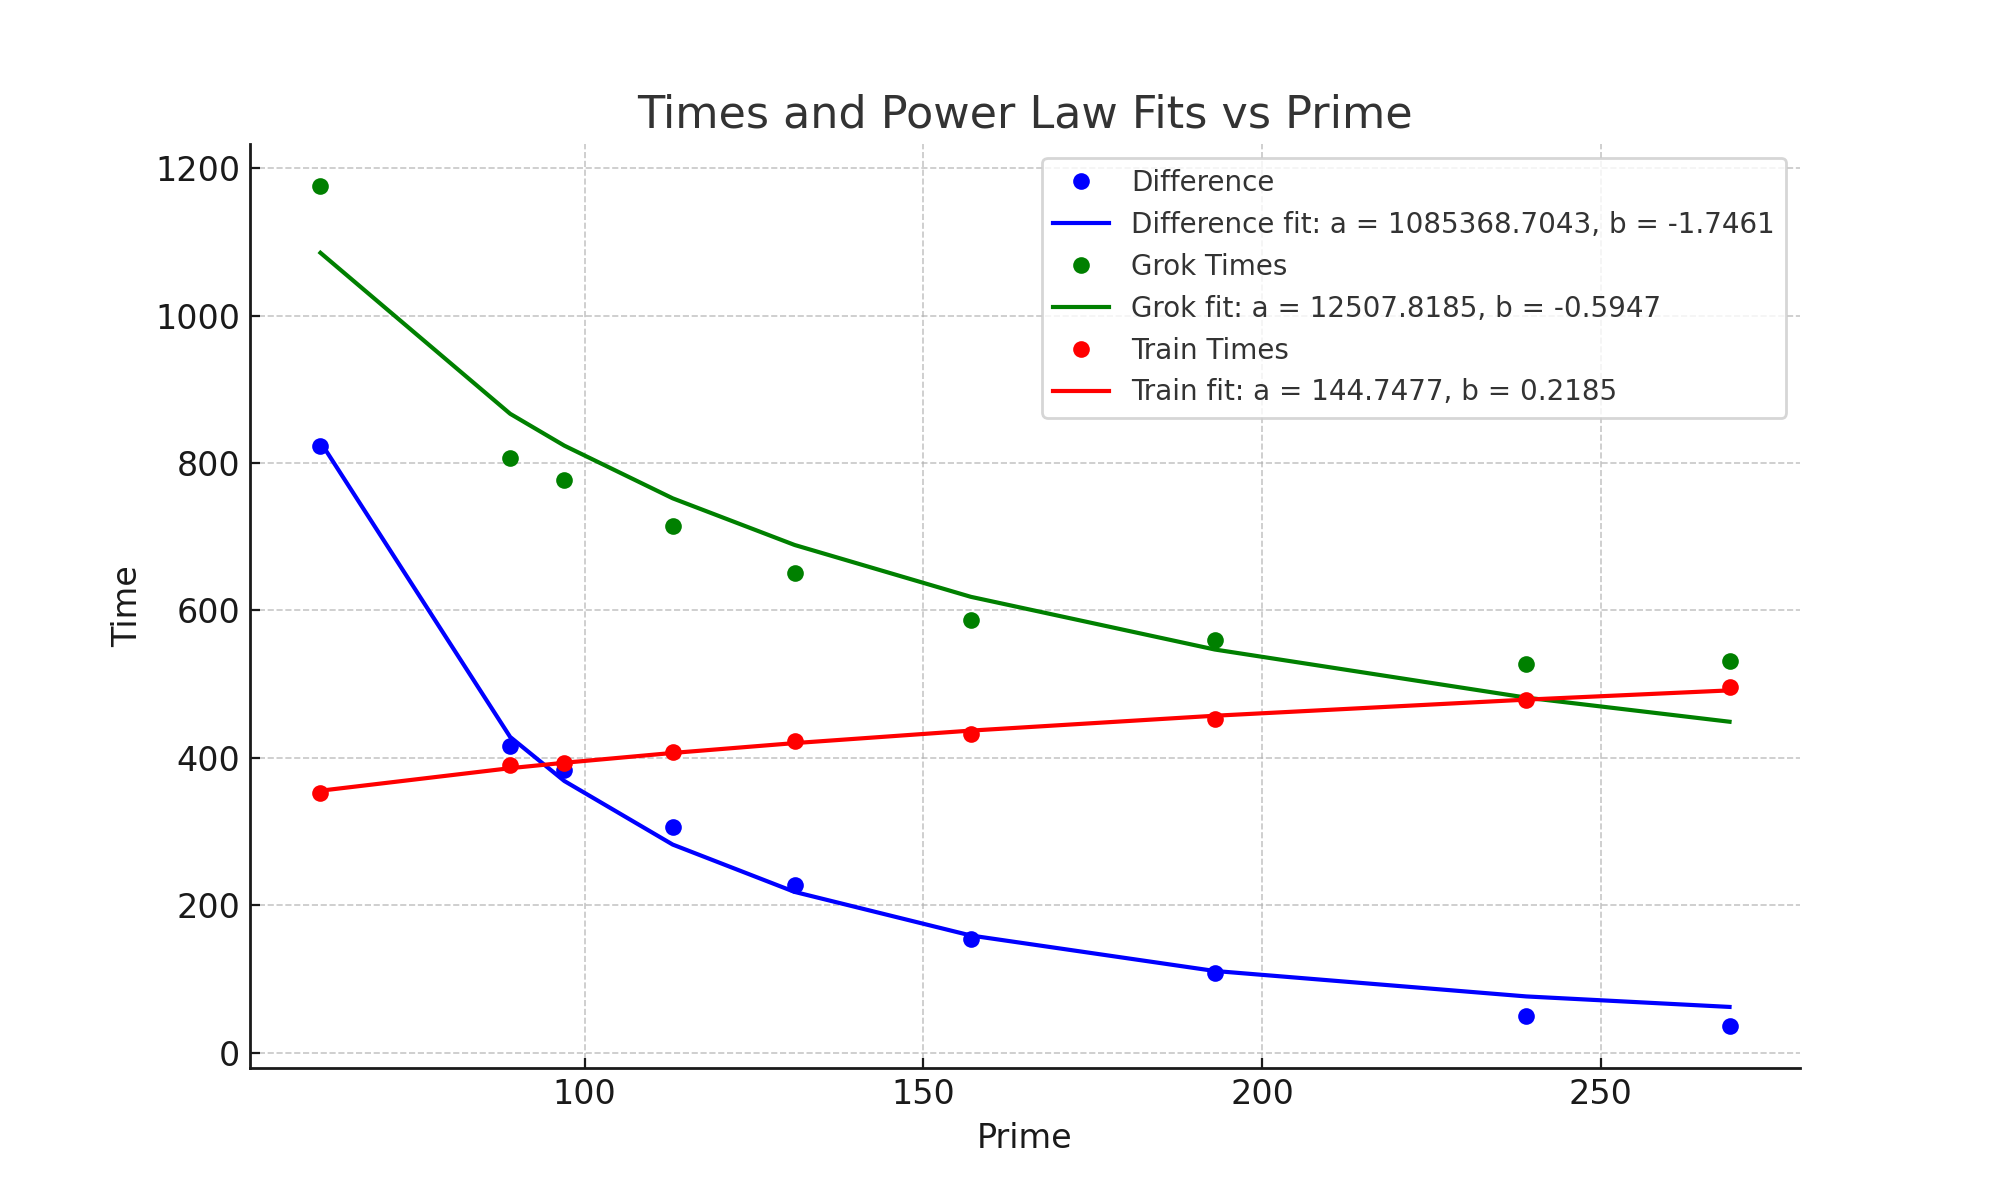

In [ ]:
# More Primes
results = torch.load('/content/gdrive/My Drive//Files/Research/Experiment/Prime_vs_time/Data/results_lr=0.011_alpha=0.6_wd=1.pt')

avg_grok_times,grok_times = calculate_grokking_times(results)
print(grok_times)
print(avg_grok_times)

train_times,avg_train_times=calculate_train_times(results)
print(train_times)
print(avg_train_times)

ValueError: ignored

Added Three more primes for validation (**didn''t update the fit**)

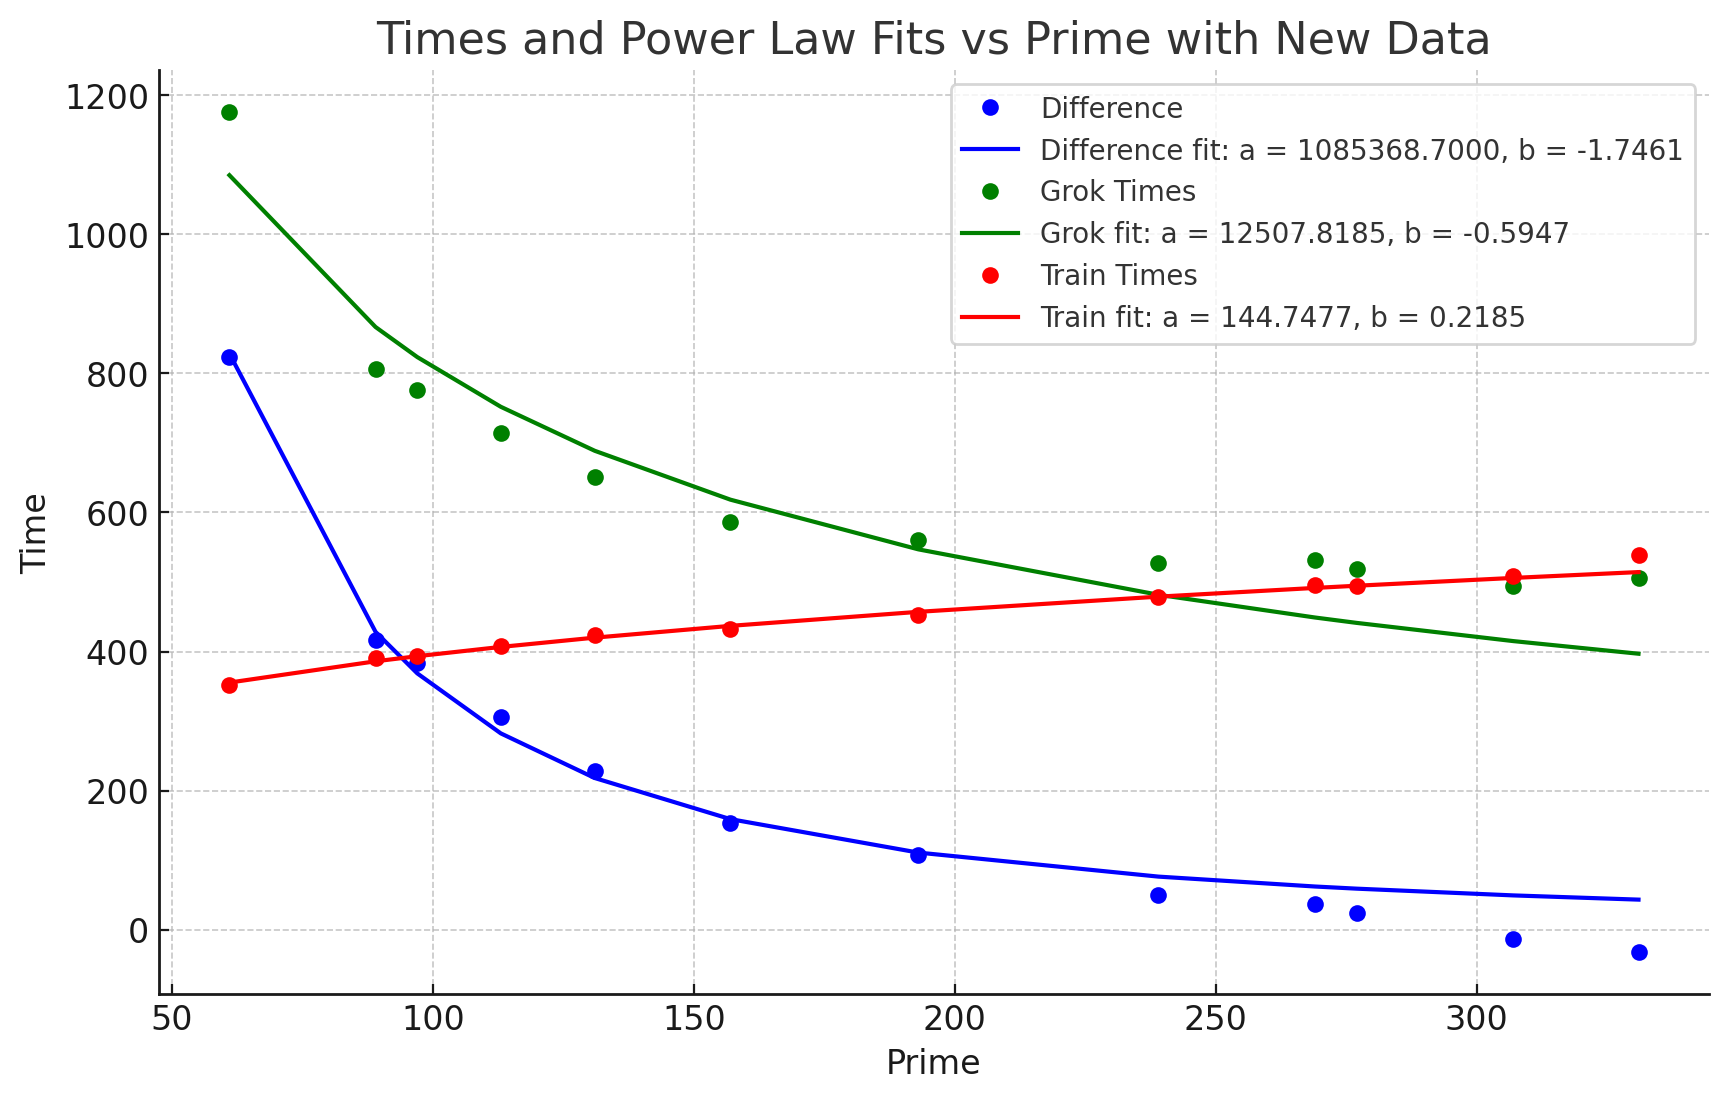

A guess of mine is that there should be a critical point, where the number of data points available, exceeds the number of Network Parameters.

**The guess is based on the fact that we can see from the previous graph. At some point, the time it takes to grok is bounded by the time it takes the network itself to train**

*The number of parameter is 3x128xp tho*

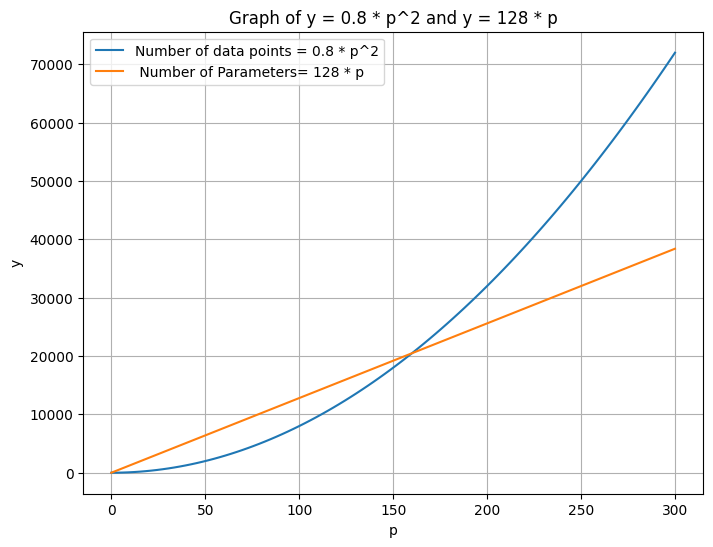

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the range of 'p' values
p_values = np.linspace(0, 300, 100)

# Calculate 'y' values for each curve
curve1_y = 0.8 * p_values ** 2
curve2_y =  128 * p_values

# Plot the curves on the same graph
plt.figure(figsize=(8, 6))
plt.plot(p_values, curve1_y, label='Number of data points = 0.8 * p^2')
plt.plot(p_values, curve2_y, label=' Number of Parameters= 128 * p')

# Add labels and title
plt.xlabel('p')
plt.ylabel('y')
plt.title('Graph of y = 0.8 * p^2 and y = 128 * p')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()
